# Fake News Detection

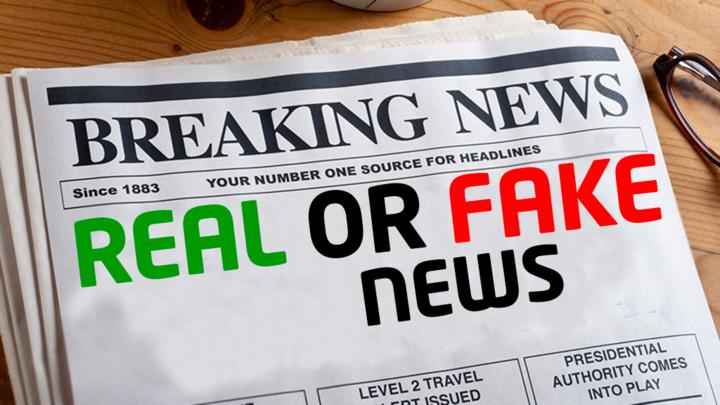


Fake news detection is the process of identifying and categorizing misinformation or deceptive content disseminated through various media channels, including social media, news websites, and online forums. 

In this unit, we use the dataset of [Kaggle Fake News Detection](https://www.kaggle.com/code/therealsampat/fake-news-detection) for practice.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Data Loading

- The original datasets include two separate CSV files: one for true news and one for fake news.

In [ ]:
## Colab Only
from google.colab import drive
drive.mount("/content/drive")
ENC2045_DEMO_DATA_DIR = '/content/drive/MyDrive/ENC2045_demo_data'


In [11]:
## Data Dir
ENC2045_DEMO_DATA_DIR = '../../../../ENC2045_demo_data/' ## change 

## Loading as dataframes
df_fake = pd.read_csv(ENC2045_DEMO_DATA_DIR + "kaggle_fake_news_detection/Fake.csv")
df_true = pd.read_csv(ENC2045_DEMO_DATA_DIR + "kaggle_fake_news_detection/True.csv")

In [12]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


- Add a new column `class` to both data frames as the target feature

In [15]:
df_fake["class"] = 0
df_true["class"] = 1

In [16]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

- Merging True and Fake Dataframes into one

In [32]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge['len'] = [len(d) for d in df_merge['text']]
df_merge.head(10)

,title,text,subject,date,class,len
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,2346
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0,1741
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0,2166
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0,2224
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0,2772
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,1644


In [33]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'len'], dtype='object')

- Some texts are too short.

In [37]:
df_merge[df_merge['len'] < 20]

,title,text,subject,date,class,len
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0,1
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017",0,1
11117,MY FAVORITE EXCUSES…Featuring Hillary Rotten C...,Enjoy:,politics,"Apr 17, 2017",0,6
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017",0,1
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017",0,1
...,...,...,...,...,...,...
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0,1
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0,1
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0,1
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",0,1


- Removing columns which are not required

In [41]:
df = df_merge[df_merge['len']> 20].drop(["title", "subject","date"], axis = 1)

- Check `NA` or `null` values

In [42]:
df.isnull().sum()

text     0
class    0
len      0
dtype: int64

## Corpus Profile

In [43]:
print('Number of Documents: {}'.format(len(df)))
print('Average document size (in chars): {}'.format(np.average([len(d) for d in df['text']])))
print('Max document size (in chars): {}'.format(np.max([len(d) for d in df['text']])))
print('Min document size (in chars): {}'.format(np.min([len(d) for d in df['text']])))
print(df['class'].value_counts())

Number of Documents: 44225
Average document size (in chars): 2506.6587450537027
Max document size (in chars): 51794
Min document size (in chars): 21
class
0    22809
1    21416
Name: count, dtype: int64


## Random Shuffling

In [51]:
np.random.seed(1)
df = df.sample( frac = 1)

In [52]:
df.head()

,text,class,len
9300,Just like with every presidential inauguration...,0,2399
16283,Lauren Southern is one tough reporter. She s n...,0,3890
25828,"Apparently, Donald Trump has yet to learn his ...",0,1889
9942,No matter how much they don t want to admit it...,0,2237
40122,We re giving asylum to people who re connected...,0,3045


In [53]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [54]:
df.columns

Index(['text', 'class', 'len'], dtype='object')

In [55]:
df.head()

,text,class,len
0,Just like with every presidential inauguration...,0,2399
1,Lauren Southern is one tough reporter. She s n...,0,3890
2,"Apparently, Donald Trump has yet to learn his ...",0,1889
3,No matter how much they don t want to admit it...,0,2237
4,We re giving asylum to people who re connected...,0,3045


## Data Preprocessing

In [57]:
def normalize(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [58]:
df["text"] = df["text"].apply(normalize)

## Train-Test Split

- Defining dependent (`y`) and independent variables (`x`)

In [59]:
X = df["text"]
y = df["class"]

- Splitting Training and Testing

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Convert text to vectors

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(min_df=10)
X_train_bow = vectorization.fit_transform(X_train)
X_test_bow = vectorization.transform(X_test)

In [62]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(29630, 23315)
(14595, 23315)


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train_bow,y_train)

LogisticRegression()

In [64]:
pred_lr=LR.predict(X_test_bow)

In [65]:
LR.score(X_test_bow, y_test)

0.9854744775608085

In [66]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7577
           1       0.98      0.99      0.98      7018

    accuracy                           0.99     14595
   macro avg       0.99      0.99      0.99     14595
weighted avg       0.99      0.99      0.99     14595



## Decision Tree Classification

In [67]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [68]:
pred_dt = DT.predict(X_test_bow)

In [69]:
DT.score(X_test_bow, y_test)

0.9952723535457348

In [70]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7577
           1       1.00      0.99      1.00      7018

    accuracy                           1.00     14595
   macro avg       1.00      1.00      1.00     14595
weighted avg       1.00      1.00      1.00     14595



## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_bow, y_train)

RandomForestClassifier(random_state=0)

In [72]:
pred_rfc = RFC.predict(X_test_bow)

In [73]:
RFC.score(X_test_bow, y_test)

0.9925316889345667

In [74]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7577
           1       0.99      0.99      0.99      7018

    accuracy                           0.99     14595
   macro avg       0.99      0.99      0.99     14595
weighted avg       0.99      0.99      0.99     14595



## SVM

In [75]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(X_train_bow, y_train)

SVC(kernel='linear')

In [76]:
pred_svm = SVM.predict(X_test_bow)

In [77]:
SVM.score(X_test_bow, y_test)

0.9922576224734498

In [78]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7577
           1       0.99      0.99      0.99      7018

    accuracy                           0.99     14595
   macro avg       0.99      0.99      0.99     14595
weighted avg       0.99      0.99      0.99     14595



## More considerations
Using a bag of words (BoW) approach for fake news detection presents several challenges and potential issues:

1. **Lack of Filtering**: Without thorough filtering, the BoW model may include irrelevant or noisy words, leading to less accurate representations of text. This can result in reduced model performance and misclassification of news articles.

2. **Normalization Techniques**: BoW models often require normalization techniques such as stemming, lemmatization, and stopword removal to improve the quality of feature representations. Without these techniques, the model may treat similar words differently, reducing its effectiveness.

3. **Evaluation of Feature Importance**: Understanding which features contribute the most to fake news detection is crucial for model interpretability and improvement. Without evaluating feature importance, it's challenging to identify the most discriminative words or phrases in the text.

4. **Inclusion of Hand-Crafted Features**: While BoW models focus on word frequency, incorporating additional hand-crafted features such as modal verbs, degree adverbs, or stance-related markers can enhance the model's ability to capture linguistic nuances and contextual information.


```{tip}
:class: dropdown

`FeatureUnion` is a class in the scikit-learn library that allows you to concatenate the results of multiple transformer objects into a single feature space. It is often used in machine learning pipelines when you want to combine different feature extraction methods or handcrafted features before feeding them into a model.

`FeatureUnion` takes a list of transformer objects (e.g., `CountVectorizer()`), each of which extracts or transforms features in some way. These transformers can be instances of any class that implements the `fit` and `transform` methods, such as `CountVectorizer`, `TfidfVectorizer`, or custom transformers.

For example, we can define a Custom transformer to extract the number of modals in a text, and combine this feature with BoW for model training.

```python
# Custom transformer for counting modal verbs
class ModalVerbCounter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        modal_verbs_count = []
        modal_verbs = ['can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would']
        for text in X:
            count = sum(1 for word in text.split() if word.lower() in modal_verbs)
            modal_verbs_count.append([count])
        return modal_verbs_count

# Create a pipeline for modal verb count and text features
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('modal_verb_count', ModalVerbCounter()),
        ('text', CountVectorizer())  # Include text features
    ])),
    ('classifier', RandomForestClassifier())  # Classifier example, replace with your choice
])

# Train the model
pipeline.fit(X_train, y_train)
```

```